In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('corrected_dataset_new.csv')

In [3]:
data.head()

,Unnamed: 0,customer_index,customer_age,customer_airtime_month,customer_balance,customer_dependants,customer_education,customer_gender,customer_status,customer_self_employed,...,customer_salaries,customer_sent_month,customer_sent_week,customer_status.1,customer_took_loan_before,customer_defaulted_loan,customer_loan_given,customer_transactions,customer_withdrawal_month,customer_withdrawal_week
0,1,1,25,3839,3107,0,Postgraduate,Male,Married,Yes,...,NaN,38066,1640,Married,No,NaN,NaN,23954,17855,3416
1,2,2,40,4518,4259,2,Primary School,Female,Single,No,...,42912.0,15116,4349,Single,Yes,0.0,4840.0,44523,56888,2543
2,3,3,33,4878,6421,2,Secondary School,Male,Married,No,...,7821.0,38977,406,Married,Yes,1.0,4719.0,32461,14350,3040
3,4,4,40,402,7337,1,Primary School,Female,Married,No,...,68422.0,13601,4219,Married,Yes,0.0,589.0,16710,55845,11371
4,5,5,18,3811,5514,2,Secondary School,Female,Married,No,...,54951.0,41098,7678,Married,Yes,1.0,5652.0,27200,63928,2397


In [4]:
data.columns

Index(['Unnamed: 0', 'customer_index', 'customer_age',
       'customer_airtime_month', 'customer_balance', 'customer_dependants',
       'customer_education', 'customer_gender', 'customer_status',
       'customer_self_employed', 'customer_receive_week',
       'customer_receive_month', 'customer_salaries', 'customer_sent_month',
       'customer_sent_week', 'customer_status.1', 'customer_took_loan_before',
       'customer_defaulted_loan', 'customer_loan_given',
       'customer_transactions', 'customer_withdrawal_month',
       'customer_withdrawal_week'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Unnamed: 0                   5000 non-null int64
customer_index               5000 non-null int64
customer_age                 5000 non-null int64
customer_airtime_month       5000 non-null int64
customer_balance             5000 non-null int64
customer_dependants          5000 non-null int64
customer_education           5000 non-null object
customer_gender              5000 non-null object
customer_status              5000 non-null object
customer_self_employed       5000 non-null object
customer_receive_week        5000 non-null int64
customer_receive_month       5000 non-null int64
customer_salaries            2480 non-null float64
customer_sent_month          5000 non-null int64
customer_sent_week           5000 non-null int64
customer_status.1            5000 non-null object
customer_took_loan_before    5000 non-null object
customer_defaulted_loan      3252 non-null float64
c

In [6]:
data.drop(columns = ['Unnamed: 0','customer_index','customer_status.1'],inplace=True)

In [7]:
data.head()

,customer_age,customer_airtime_month,customer_balance,customer_dependants,customer_education,customer_gender,customer_status,customer_self_employed,customer_receive_week,customer_receive_month,customer_salaries,customer_sent_month,customer_sent_week,customer_took_loan_before,customer_defaulted_loan,customer_loan_given,customer_transactions,customer_withdrawal_month,customer_withdrawal_week
0,25,3839,3107,0,Postgraduate,Male,Married,Yes,8647,6744,NaN,38066,1640,No,NaN,NaN,23954,17855,3416
1,40,4518,4259,2,Primary School,Female,Single,No,2612,27272,42912.0,15116,4349,Yes,0.0,4840.0,44523,56888,2543
2,33,4878,6421,2,Secondary School,Male,Married,No,7918,6536,7821.0,38977,406,Yes,1.0,4719.0,32461,14350,3040
3,40,402,7337,1,Primary School,Female,Married,No,11922,40508,68422.0,13601,4219,Yes,0.0,589.0,16710,55845,11371
4,18,3811,5514,2,Secondary School,Female,Married,No,8980,37941,54951.0,41098,7678,Yes,1.0,5652.0,27200,63928,2397


In [8]:
data[['customer_salaries','customer_defaulted_loan','customer_loan_given']].head()

,customer_salaries,customer_defaulted_loan,customer_loan_given
0,NaN,NaN,NaN
1,42912.0,0.0,4840.0
2,7821.0,1.0,4719.0
3,68422.0,0.0,589.0
4,54951.0,1.0,5652.0


In [9]:
data['customer_salaries'].mean()

40991.754838709676

In [10]:
data['customer_loan_given'].mean()

7611.875461254613

In [11]:
data['customer_education'].unique()

array(['Postgraduate', 'Primary School', 'Secondary School',
       'Undergraduate'], dtype=object)

In [12]:
data['customer_status'].unique()

array(['Married', 'Single'], dtype=object)

In [13]:
mapping1 = {'Postgraduate':4,'Undergraduate':3,'Secondary School':2,'Primary School':1}
data['customer_education']=data['customer_education'].map(mapping1)
mapping2 = {'Male':1,'Female':0}
data['customer_gender']=data['customer_gender'].map(mapping2)
mapping3 = {'Married':1,'Single':0}
data['customer_status']=data['customer_status'].map(mapping3)
mapping4 = {'Yes':1,'No':0}
data['customer_self_employed']=data['customer_self_employed'].map(mapping4)
mapping5= {'Yes':1,'No':0}
data['customer_took_loan_before']=data['customer_took_loan_before'].map(mapping5)

In [14]:
data['customer_salaries'].fillna(data['customer_salaries'].mean(),inplace = True)
data['customer_loan_given'].fillna(data['customer_loan_given'].mean(),inplace = True)

In [15]:
data.head()

,customer_age,customer_airtime_month,customer_balance,customer_dependants,customer_education,customer_gender,customer_status,customer_self_employed,customer_receive_week,customer_receive_month,customer_salaries,customer_sent_month,customer_sent_week,customer_took_loan_before,customer_defaulted_loan,customer_loan_given,customer_transactions,customer_withdrawal_month,customer_withdrawal_week
0,25,3839,3107,0,4,1,1,1,8647,6744,40991.754839,38066,1640,0,NaN,7611.875461,23954,17855,3416
1,40,4518,4259,2,1,0,0,0,2612,27272,42912.000000,15116,4349,1,0.0,4840.000000,44523,56888,2543
2,33,4878,6421,2,2,1,1,0,7918,6536,7821.000000,38977,406,1,1.0,4719.000000,32461,14350,3040
3,40,402,7337,1,1,0,1,0,11922,40508,68422.000000,13601,4219,1,0.0,589.000000,16710,55845,11371
4,18,3811,5514,2,2,0,1,0,8980,37941,54951.000000,41098,7678,1,1.0,5652.000000,27200,63928,2397


In [79]:
#pd.get_dummies(data[['customer_gender','customer_status','customer_self_employed','customer_took_loan_before']]).head()

In [18]:
cor = data.corr()
cor

,customer_age,customer_airtime_month,customer_balance,customer_dependants,customer_education,customer_gender,customer_status,customer_self_employed,customer_receive_week,customer_receive_month,customer_salaries,customer_sent_month,customer_sent_week,customer_took_loan_before,customer_defaulted_loan,customer_loan_given,customer_transactions,customer_withdrawal_month,customer_withdrawal_week
customer_age,1.000000,0.016174,0.003225,-0.009593,0.011886,0.002176,0.002130,-3.315377e-02,-0.010093,0.021378,7.623512e-03,0.000880,-0.026601,-4.482665e-03,-0.008006,1.161775e-02,0.005176,0.020133,0.015028
customer_airtime_month,0.016174,1.000000,0.008823,0.021336,0.012337,-0.013351,0.009079,1.145358e-02,0.002244,0.020671,3.717908e-03,0.023307,0.005431,-1.095173e-05,0.023281,7.824278e-03,0.000872,-0.009941,-0.002901
customer_balance,0.003225,0.008823,1.000000,-0.003773,0.009126,0.018437,0.004129,1.322152e-02,0.018235,0.009976,8.137793e-03,0.026082,-0.001747,-6.557270e-03,0.029064,-6.856276e-03,0.028163,0.009342,-0.007753
customer_dependants,-0.009593,0.021336,-0.003773,1.000000,0.005480,0.012046,-0.001720,2.115195e-03,0.005680,0.017372,-3.146059e-03,-0.003533,-0.002148,1.623953e-02,0.000787,2.314783e-02,0.010896,-0.020821,-0.020384
customer_education,0.011886,0.012337,0.009126,0.005480,1.000000,0.030443,-0.000508,1.641606e-02,-0.001275,0.021858,2.890989e-02,-0.002441,0.001204,-2.229198e-02,0.027141,-9.459823e-03,0.003556,-0.015871,0.006692
customer_gender,0.002176,-0.013351,0.018437,0.012046,0.030443,1.000000,0.011694,-1.085500e-02,0.009076,-0.011522,1.367427e-02,-0.015957,0.008052,-6.758598e-03,0.004259,3.564341e-03,-0.007060,-0.014642,0.015453
customer_status,0.002130,0.009079,0.004129,-0.001720,-0.000508,0.011694,1.000000,1.051011e-02,0.006067,0.010170,-1.106967e-02,-0.012375,-0.008663,2.612083e-03,0.045262,-2.821325e-02,0.005535,0.020926,-0.030628
customer_self_employed,-0.033154,0.011454,0.013222,0.002115,0.016416,-0.010855,0.010510,1.000000e+00,-0.022470,-0.004467,4.745362e-16,0.006382,0.004836,2.348182e-02,-0.014033,-2.542833e-03,0.000548,-0.014579,-0.003652
customer_receive_week,-0.010093,0.002244,0.018235,0.005680,-0.001275,0.009076,0.006067,-2.247010e-02,1.000000,-0.012750,-9.717283e-04,-0.003405,0.005198,-4.563846e-04,0.025483,9.048147e-03,-0.017653,0.006443,0.030300
customer_receive_month,0.021378,0.020671,0.009976,0.017372,0.021858,-0.011522,0.010170,-4.467196e-03,-0.012750,1.000000,3.116159e-02,0.003922,-0.014881,-1.244614e-02,0.004453,2.331923e-02,-0.004768,0.004021,0.006875


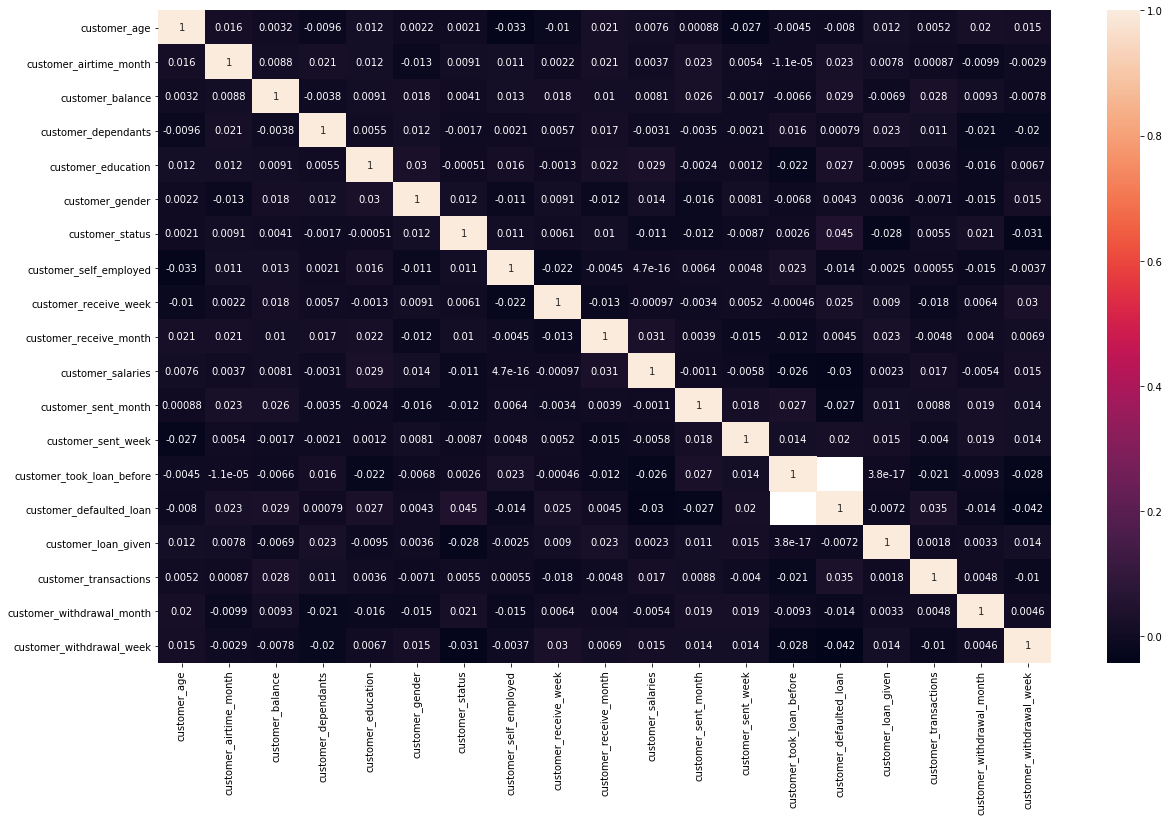

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot = True)


In [21]:
#correlation with the output variable
cor_target = abs(cor['customer_loan_given'])
cor_target

customer_age                 1.161775e-02
customer_airtime_month       7.824278e-03
customer_balance             6.856276e-03
customer_dependants          2.314783e-02
customer_education           9.459823e-03
customer_gender              3.564341e-03
customer_status              2.821325e-02
customer_self_employed       2.542833e-03
customer_receive_week        9.048147e-03
customer_receive_month       2.331923e-02
customer_salaries            2.332007e-03
customer_sent_month          1.131864e-02
customer_sent_week           1.498984e-02
customer_took_loan_before    3.809481e-17
customer_defaulted_loan      7.179690e-03
customer_loan_given          1.000000e+00
customer_transactions        1.754414e-03
customer_withdrawal_month    3.290526e-03
customer_withdrawal_week     1.385926e-02
Name: customer_loan_given, dtype: float64

In [72]:
#selecting highly correlated features with respect to the target variable
relevant_features = cor_target[cor_target>0.005]
relevant_features
K = ['customer_age',
'customer_airtime_month',     
'customer_balance',           
'customer_dependants',        
'customer_education',         
'customer_status',            
'customer_receive_week',      
'customer_receive_month',     
'customer_sent_month'         
'customer_sent_week',              
'customer_withdrawal_week'  ]

# MACHINE LEARNING

In [87]:
X = data.drop(columns = ['customer_loan_given','customer_defaulted_loan'])
y = data['customer_loan_given']
y1 = data['customer_defaulted_loan']

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 2 )

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train)
X_test_transform = sc.transform(X_test)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
accuracy = model.score(X_test_transform,y_test)
accuracy

-0.0036987167519626496

FEATURE SELECTION

In [93]:
import statsmodels.formula.api as sm

In [94]:
model_OLS = sm.OLS(endog = y_train,exog = X_train_transform).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     customer_loan_given   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.004
Method:                  Least Squares   F-statistic:                    0.1574
Date:                 Mon, 29 Jul 2019   Prob (F-statistic):               1.00
Time:                         17:24:13   Log-Likelihood:                -36560.
No. Observations:                 3500   AIC:                         7.315e+04
Df Residuals:                     3483   BIC:                         7.326e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            32.3227    141.539      0.228      0.819    -245.185     309.830
x2            14.3410    141.337      0.101      0.919    -262.770     291.452
x3           -31.9076    141.239     -0.226      0.821    -308.827     245.012
x4            95.1574    141.200      0.674      0.500    -181.686     372.000
x5           -84.3328    141.349     -0.597      0.551    -361.467     192.802
x6             9.3905    141.306      0.066      0.947    -267.660     286.441
x7          -126.6385    141.219     -0.897      0.370    -403.519     150.242
x8            -0.0728    141.483     -0.001      1.000    -277.470     277.325
x9            47.7659    141.340      0.338      0.735    -229.352     324.883
x10           70.2366    141.408      0.497      0.619    -207.014     347.487
x11            1.2587    141.405      0.009      0.993    -275.986     278.503
x12            9.9873    141.344      0.071      0.944    -267.138     287.112
x13           47.3202    141.301      0.335      0.738    -229.722     324.362
x14          -15.4630    141.362     -0.109      0.913    -292.624     261.698
x15           37.6119    141.403      0.266      0.790    -239.630     314.854
x16           -9.7982    141.334     -0.069      0.945    -286.905     267.308
x17           84.2821    141.461      0.596      0.551    -193.072     361.636
==============================================================================
Omnibus:                       10.258   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.321
Skew:                           0.026   Prob(JB):                       0.0156
Kurtosis:                       2.767   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""